### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Importing Training and Test Datasets

In [2]:
train_df = pd.read_csv('train_LZdllcl.csv')
test_df = pd.read_csv('test_2umaH9m.csv')

In [3]:
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
test_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [5]:
train_df.describe(exclude = 'object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train_df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [7]:
test_df.describe(exclude = 'object')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [8]:
test_df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,16596,13078


In [9]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
test_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Categorical and Numerical Features

In [13]:
categorical_features = [column_name for column_name in train_df.columns if train_df[column_name].dtype == 'O']
print('Categorical Features : {}'.format(len(categorical_features)))
print('Categorical Features : {}'.format(categorical_features))

Categorical Features : 5
Categorical Features : ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [14]:
numerical_features = [column_name for column_name in train_df.columns if train_df[column_name].dtype != 'O']
print('Numerical Features : {}'.format(len(numerical_features)))
print('Numerical Features : {}'.format(numerical_features))

Numerical Features : 9
Numerical Features : ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [15]:
train_df[categorical_features].isna().sum()

department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

In [16]:
train_df[numerical_features].isna().sum()

employee_id                0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Filling the Missing Values using Mean.

In [17]:
for feature in numerical_features:
    mean_value = train_df[feature].mean()
    train_df[feature].fillna(mean_value, inplace = True)

In [18]:
train_df['previous_year_rating'].isna().sum()

0

In [19]:
train_df[categorical_features].isna().sum()

department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

In [20]:
train_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Filling the MIssing Values using Mode.

In [21]:
for feature in categorical_features:
    mode_value = train_df[feature].mode()[0]
    train_df[feature].fillna(mode_value, inplace = True)

In [22]:
train_df[categorical_features].isna().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

In [23]:
categorical_features = [column_name for column_name in test_df.columns if test_df[column_name].dtype == 'O']
print('Categorical Features : {}'.format(len(categorical_features)))
print('Categorical Features : {}'.format(categorical_features))

Categorical Features : 5
Categorical Features : ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [24]:
numerical_features = [column_name for column_name in test_df.columns if test_df[column_name].dtype != 'O']
print('Numerical Features : {}'.format(len(numerical_features)))
print('Numerical Features : {}'.format(numerical_features))

Numerical Features : 8
Numerical Features : ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [25]:
test_df[categorical_features].isna().sum()

department                0
region                    0
education              1034
gender                    0
recruitment_channel       0
dtype: int64

In [26]:
test_df['education'].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

Filling the Missing Values using Mode.

In [27]:
for feature in categorical_features:
    mode_value = test_df[feature].mode()[0]
    test_df[feature].fillna(mode_value, inplace = True)

In [28]:
test_df[categorical_features].isna().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

In [29]:
test_df[numerical_features].isna().sum()

employee_id                0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Filling the Missing Values using Mean.

In [30]:
for feature in numerical_features:
    mean_value = test_df[feature].mean()
    test_df[feature].fillna(mean_value, inplace = True)

In [31]:
test_df[numerical_features].isna().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [32]:
train_df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [33]:
test_df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


Encoding the Categorical Variables into Numerical Variables.

In [36]:
def encode_data(feature_name):
    
    '''
    
    function which takes feature name as a parameter and return mapping dictionary to replace (or map) categorical data to numerical data
    
    
    '''
    
    mapping_dict = {}
    unique_values = list(train_df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
        
    print(mapping_dict)
    return mapping_dict

In [37]:
train_df['department'].replace(encode_data('department'), inplace = True)

{'Sales & Marketing': 0, 'Operations': 1, 'Technology': 2, 'Analytics': 3, 'R&D': 4, 'Procurement': 5, 'Finance': 6, 'HR': 7, 'Legal': 8}


In [38]:
train_df['region'].replace(encode_data('region'), inplace = True)

{'region_7': 0, 'region_22': 1, 'region_19': 2, 'region_23': 3, 'region_26': 4, 'region_2': 5, 'region_20': 6, 'region_34': 7, 'region_1': 8, 'region_4': 9, 'region_29': 10, 'region_31': 11, 'region_15': 12, 'region_14': 13, 'region_11': 14, 'region_5': 15, 'region_28': 16, 'region_17': 17, 'region_13': 18, 'region_16': 19, 'region_25': 20, 'region_10': 21, 'region_27': 22, 'region_30': 23, 'region_12': 24, 'region_21': 25, 'region_8': 26, 'region_32': 27, 'region_6': 28, 'region_33': 29, 'region_24': 30, 'region_3': 31, 'region_9': 32, 'region_18': 33}


In [39]:
train_df['education'].replace(encode_data('education'), inplace = True)

{"Master's & above": 0, "Bachelor's": 1, 'Below Secondary': 2}


In [40]:
train_df['gender'].replace(encode_data('gender'), inplace = True)

{'f': 0, 'm': 1}


In [41]:
train_df['recruitment_channel'].replace(encode_data('recruitment_channel'), inplace = True)

{'sourcing': 0, 'other': 1, 'referred': 2}


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int64  
 2   region                54808 non-null  int64  
 3   education             54808 non-null  int64  
 4   gender                54808 non-null  int64  
 5   recruitment_channel   54808 non-null  int64  
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.9 MB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [44]:
def encode_data(feature_name):
    
    '''
    
    function while takes feature name as a parameter and return mapping dictionary to replace (or map) categorical data to numerical data
    
    '''
    
    mapping_dict = {}
    unique_values = list(test_df[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
        
    print(mapping_dict)
    return mapping_dict

In [45]:
test_df['department'].replace(encode_data('department'), inplace = True)

{'Technology': 0, 'HR': 1, 'Sales & Marketing': 2, 'Procurement': 3, 'Finance': 4, 'Analytics': 5, 'Operations': 6, 'Legal': 7, 'R&D': 8}


In [46]:
test_df['region'].replace(encode_data('region'), inplace = True)

{'region_26': 0, 'region_4': 1, 'region_13': 2, 'region_2': 3, 'region_29': 4, 'region_7': 5, 'region_22': 6, 'region_16': 7, 'region_17': 8, 'region_24': 9, 'region_11': 10, 'region_27': 11, 'region_9': 12, 'region_20': 13, 'region_34': 14, 'region_23': 15, 'region_8': 16, 'region_14': 17, 'region_31': 18, 'region_19': 19, 'region_5': 20, 'region_28': 21, 'region_15': 22, 'region_3': 23, 'region_25': 24, 'region_12': 25, 'region_21': 26, 'region_30': 27, 'region_10': 28, 'region_33': 29, 'region_32': 30, 'region_6': 31, 'region_1': 32, 'region_18': 33}


In [47]:
test_df['education'].replace(encode_data('education'), inplace = True)

{"Bachelor's": 0, "Master's & above": 1, 'Below Secondary': 2}


In [48]:
test_df['gender'].replace(encode_data('gender'), inplace = True)

{'m': 0, 'f': 1}


In [49]:
test_df['recruitment_channel'].replace(encode_data('recruitment_channel'), inplace = True)

{'sourcing': 0, 'other': 1, 'referred': 2}


In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int64  
 2   region                23490 non-null  int64  
 3   education             23490 non-null  int64  
 4   gender                23490 non-null  int64  
 5   recruitment_channel   23490 non-null  int64  
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.3 MB


Splitting the Dataset into Training and Test sets.

In [51]:
X_train = train_df.drop('is_promoted', axis = 1)
y_train = train_df['is_promoted']
X_test = test_df.drop('employee_id', axis = 1)

In [52]:
X_train = X_train.drop('employee_id', axis = 1)

In [53]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,0,0,0,0,1,35,5.0,8,1,0,49
1,1,1,1,1,1,1,30,5.0,4,0,0,60
2,0,2,1,1,0,1,34,3.0,7,0,0,50
3,0,3,1,1,1,2,39,1.0,10,0,0,50
4,2,4,1,1,1,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,13,1,1,0,1,48,3.0,17,0,0,78
54804,1,22,0,0,1,1,37,2.0,6,0,0,56
54805,3,8,1,1,1,1,27,5.0,3,1,0,79
54806,0,32,1,1,0,1,29,1.0,2,0,0,45


In [54]:
X_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,0,0,0,0,1,24,3.339146,1,1,0,77
1,1,1,0,1,1,1,31,3.000000,5,0,0,51
2,2,2,0,0,1,1,31,1.000000,4,0,0,47
3,3,3,0,1,1,3,31,2.000000,9,0,0,65
4,4,4,0,0,0,1,30,4.000000,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,7,3,2,0,0,1,24,3.000000,1,0,0,61
23486,0,24,0,0,0,1,31,3.000000,7,0,0,74
23487,1,7,0,1,0,1,26,4.000000,4,0,0,50
23488,3,18,0,0,0,3,27,3.339146,1,0,0,70


In [55]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

### Model Testing

In [56]:
sgd = SGDClassifier(max_iter = 5, tol = None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train)*100, 2)

In [57]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)
acc_logreg = round(logreg.score(X_train, y_train)*100, 2)

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)

In [60]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100, 2)

In [61]:
perceptron = Perceptron(max_iter = 10)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100, 2)

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [62]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train)*100, 2)

C:\Users\sadha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)

In [64]:
results = pd.DataFrame({'MOdel' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Decision Tree'], 'Score' : [acc_linear_svc, acc_knn, acc_logreg, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
results_df = results.sort_values(by = 'Score', ascending = False)
results_df = results_df.set_index('Score')
results_df.head(9)

,MOdel
Score,
99.97,Random Forest
99.97,Decision Tree
93.97,KNN
91.68,Stochastic Gradient Descent
91.62,Logistic Regression
91.49,Support Vector Machines
91.49,Perceptron
91.27,Naive Bayes


As we see Random Forest and Decision Tree models gives the maximum accuracy.

In [67]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = 'accuracy')

print('Scores : ', scores)
print('Mean : ', scores.mean())
print('Standard Deviation : ', scores.std())

Scores :  [0.93723773 0.93742018 0.93304142 0.93577814 0.93431856 0.93778508
 0.93760263 0.93960956 0.9350365  0.93394161]
Mean :  0.9361771388086515
Standard Deviation :  0.0019701259310692704


In [69]:
importances = pd.DataFrame({'Feature' : X_train.columns, 'importance' : np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values(by = 'importance', ascending = False).set_index('Feature')
importances.head(12)

,importance
Feature,
avg_training_score,0.299
age,0.141
department,0.114
region,0.111
length_of_service,0.103
previous_year_rating,0.056
KPIs_met >80%,0.046
recruitment_channel,0.035
awards_won?,0.029


<AxesSubplot:xlabel='Feature'>

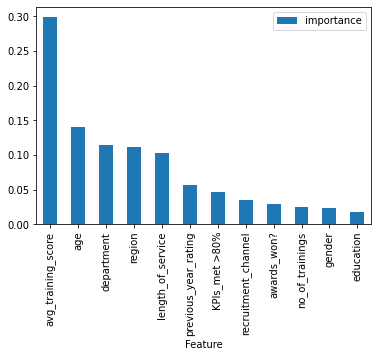

In [70]:
importances.plot.bar()

In [71]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)
random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
print(round(acc_random_forest, 2,), '%')

99.97 %


In [72]:
print('OOB Score : ', round(random_forest.oob_score_, 4)*100, '%')

OOB Score :  93.49 %


In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv = 3)
confusion_matrix(y_train, predictions)

array([[49907,   233],
       [ 3322,  1346]], dtype=int64)

In [74]:
from sklearn.metrics import precision_score, recall_score
print('Precision : ', precision_score(y_train, predictions))
print('Recall : ', recall_score(y_train, predictions))

Precision :  0.8524382520582647
Recall :  0.28834618680377033


In [75]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.430926844885545

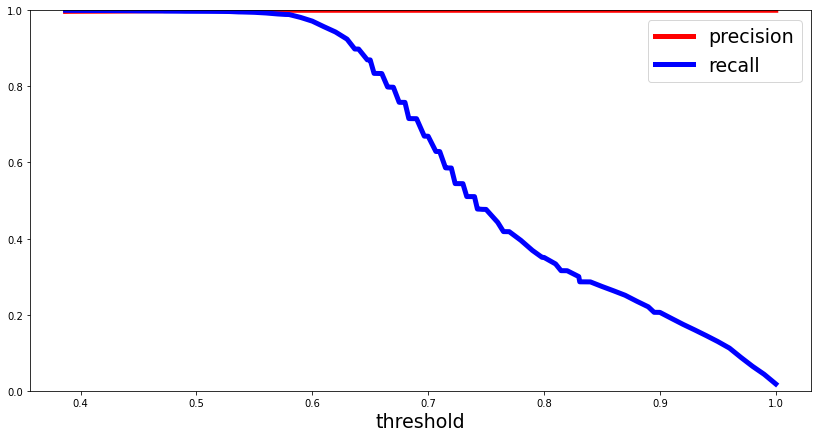

In [76]:
from sklearn.metrics import precision_recall_curve
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:, 1]
precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label = 'precision', linewidth = 5)
    plt.plot(threshold, recall[:-1], 'b', label = 'recall', linewidth = 5)
    plt.xlabel('threshold', fontsize = 19)
    plt.legend(loc = 'upper right', fontsize = 19)
    plt.ylim([0, 1])
    
    
plt.figure(figsize = (14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

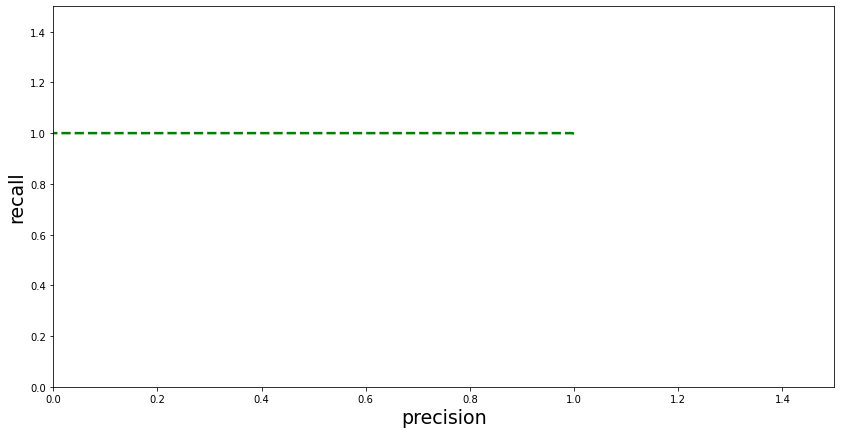

In [77]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, 'g--', linewidth = 2.5)
    plt.ylabel('recall', fontsize = 19)
    plt.xlabel('precision', fontsize = 19)
    plt.axis([0, 1.5, 0, 1.5])
    
plt.figure(figsize = (14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

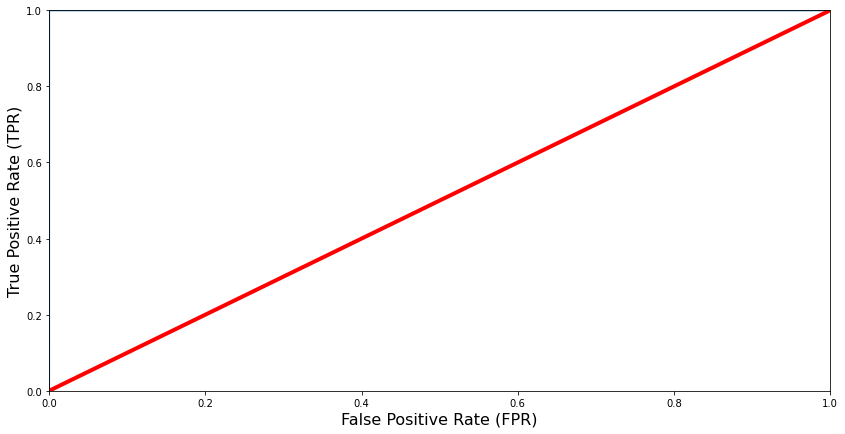

In [78]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'r', linewidth = 4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)', fontsize = 16)
    plt.ylabel('True Positive Rate (TPR)', fontsize = 16)
    
plt.figure(figsize = (14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print('ROC-AUC-Scores : ', r_a_score)

ROC-AUC-Scores :  0.9999995385670764


In [80]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)

Converting the Predictions into a CSV File.

In [82]:
submission = pd.DataFrame({'employee_id' : test_df.employee_id, 'is_promoted' : y_pred})
submission.to_csv('my_submission.csv', index = False)